<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/Ejercicio1_RLC_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución simbólica en un circuito RLC

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

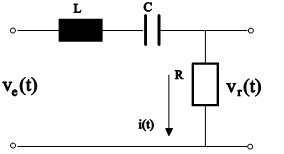

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t) + \frac{1}{L}v_e(t)  \\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)
\end{cases}
\end{equation*} \tag*{}$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [1]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [2]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [3]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
The following additional packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil
Suggested packages:
  python-mpmath-doc python3-gmpy2 python3-matplotlib python-numpy-doc python3-pytest python-pil-doc
  texlive-fonts-extra dvipng python-sympy-doc
The following NEW packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil python3-sympy
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,725 kB of archives.
After this operation, 54.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libraqm0 amd64 0.7.0-4ubuntu1 [11.7 kB]
Get:3

In [4]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [5]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [6]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


# Ejercicio 1

## **Solución simbólica**

In [21]:
%%writefile RLC_Escalon_Simbolico.m
clear all; clc; % borra toda variable anterior
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic, lo que esta en la celda 6
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python. Esto lo pide el Octave instalado también

%Inicializo los parametros dados
R=1;L=1;C=1; Ve = 12

%Defino funciones simbolicas, corriente y voltaje del capacitor
syms ii(t) vc(t)

%defino como primera ecuación que la derivada de Vc es igual a i/c
ode1=diff(vc)==ii/C
%defino como segunda ecuación que la derivada segunda de Vc es igual a ..
ode2=diff(ii)==-(R/L)*ii-(1/L)*vc+(1/L)*heaviside(1)*Ve

%Defino condiciones iniciales para cada funcion simbolica
cond1 = ii(0) == 0;
cond2 = vc(0) == 0;

%Creo un arreglo con las condiciones y funciones
conds = [cond1;cond2];
odes = [ode1; ode2];

%Llamo a la funcion para resolver las ecuaciones simbolicas de segundo orden lineales
Sol=dsolve(odes,cond1,cond2);

%Sol es un "struct", para acceder a la solución de datos corriente y voltaje hago:
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.vc)

T = 0:0.1:3
i_plot = double(subs(Corriente,t,T))
vc_plot = double(subs(Tension,t,T))

subplot(211)
plot(T,i_plot,'--')
xlabel('tiempo [s]')
ylabel('corriente [A]')
subplot(212)
plot(T,vc_plot,'--')
xlabel('tiempo [s]')
ylabel('Voltaje capacitor [v]')

print -dpng Ejercicio1a.png;

Overwriting RLC_Escalon_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [22]:
!octave -W RLC_Escalon_Simbolico.m # -W : no window system

Ve = 12
Symbolic pkg v3.1.1: Python communication link active, SymPy v1.5.1.
ode1 = (sym)

  d                
  ──(vc(t)) = ii(t)
  dt               

ode2 = (sym)

  d                              
  ──(ii(t)) = -ii(t) - vc(t) + 12
  dt                             

Corriente = (sym)

        -t           
        ───          
         2     ⎛√3⋅t⎞
  8⋅√3⋅ℯ   ⋅sin⎜────⎟
               ⎝ 2  ⎠

Tension = (sym)

             -t               
             ───              
              2     ⎛√3⋅t   π⎞
  12 - 8⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                    ⎝ 2     3⎠

T =

 Columns 1 through 8:

         0    0.1000    0.2000    0.3000    0.4000    0.5000    0.6000    0.7000

 Columns 9 through 16:

    0.8000    0.9000    1.0000    1.1000    1.2000    1.3000    1.4000    1.5000

 Columns 17 through 24:

    1.6000    1.7000    1.8000    1.9000    2.0000    2.1000    2.2000    2.3000

 Columns 25 through 31:

    2.4000    2.5000    2.6000    2.7000    2.8000    2.9000    3.0000

    doub

Para mostrar los gráficos de corriente y tensión utilizo la función display de IPython

## **Resultados puntos 1a**

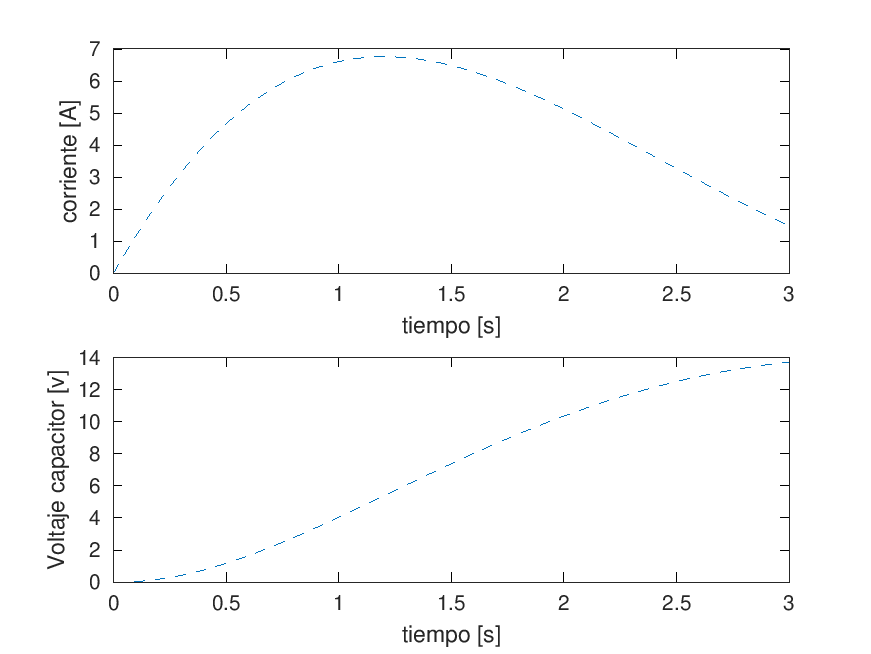

In [23]:
from IPython import display
display.Image('Ejercicio1a.png')

# Verificación numérica

Realizco un script para verificar la integración numérica del espacio

In [34]:
%%writefile Euler_RLC.m
%Funcion modelo
function [C,V,t]= Euler_RLC(R,L,C,Ve,tiempo_fin);
# Esta funcion calcula los parametros de corriente y voltaje como tambien el tiempo
# de integración en el cual se alcanza el transitorio.
# input : R, resistencia en ohm
#         L, inductancia en H
#         C, capacitancia en F
#         Ve, voltaje de entrada en V
#         tiempo_fin, el tiempo en el cual se tiene interez conocer la respuesta.
#
# Output: C, corriente en A
#         V, voltaje del capacitor en V
#         t, tiempo en s

#Matrices del espacio de estado
A=[-R/L, -1/L;1/C,0]
B=[1/L;0]
# Autovalores de A, definirá el tiempo de integración
avalor = eig(A)

#Bloque de calculo de tiempo de integración
tL = 0; # utilizo este como flag. Si los autovalores son complejos, preseteo un paso
if iscomplex(avalor(1))
  # paso seleccionado "a dedo" para el caso de autovalores complejos
  tR = log(0.95)/abs(avalor(1));
  primer_elevado =-floor(log10(abs(tR)));
  primera_sig = fix(tR*10.^primer_elevado);
  h1 = abs( primera_sig * 10^-primer_elevado); #paso recomendado

  tL = abs(log(0.05)/abs(avalor(2)));
  if tiempo_fin > 4*tL
    tau = 3*tL;
  else
    tau = tiempo_fin;
  endif
  cantidad_pasos = ceil(tau/h1)+1; # determino la cantidad de pasos necesarios para obtener el tiempo tau

else
  # calculo el paso óptimo y el tiempo donde aplicar este paso caso autovalores reales
  tR = log(0.95)/avalor(1);
  primer_elevado =-floor(log10(abs(tR)));
  primera_sig = fix(tR*10.^primer_elevado);
  h1 = primera_sig * 10^-primer_elevado ;#paso recomendado

  # calculo del tau: tiempo donde se alcanza el 90% estacionario
  tL = log(0.05)/avalor(2);
  tau = 3*tL;
  cantidad_pasos = round(tau/h1) ;# determino la cantidad de pasos necesarios para obtener el tiempo tau

endif

# seteo de variables iniciales
u = Ve
X(:,1) =[0;0];
t(1) = 0;
# Integración Euler Forward para el paso elegido
for n = 1: cantidad_pasos -1
  t(n+1) = t(n)+h1;
  Xp(:,n) = A*X(:,n)+B*u;
  X(:,n+1) = X(:,n)+Xp(:,n)*h1;
endfor
C = X(1,:);
V = X(2,:);
endfunction

Overwriting Euler_RLC.m


In [27]:
%%writefile RLC_Escalon_Numerico_a.m
 Ra=1;La=1;Ca=1;
 Ve = 12;
 tiempo_fin = 3
 [C,Vc,t]= Euler_RLC(Ra,La,Ca,Ve,tiempo_fin);

subplot(211)
plot(t,C,'--')
xlabel('tiempo [s]')
ylabel('corriente [A]')
subplot(212)
plot(t,Vc,'--')
xlabel('tiempo [s]')
ylabel('Voltaje capacitor [v]')

print -dpng Ejercicio1b.png;

Overwriting RLC_Escalon_Numerico_a.m


In [28]:
!octave -W RLC_Escalon_Numerico_a.m # -W : no window system

tiempo_fin = 3
A =

  -1  -1
   1   0

B =

   1
   0

avalor =

  -0.5000 + 0.8660i
  -0.5000 - 0.8660i

u = 12

The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.
                                                                               
           |-----------------------------------------------------------|       
        7 +|+       +         **********+         +         +       +-+|       
        6 +|+       +   ******+         *******   +         +       +-+|       
        

## **Resultados punto 1b**

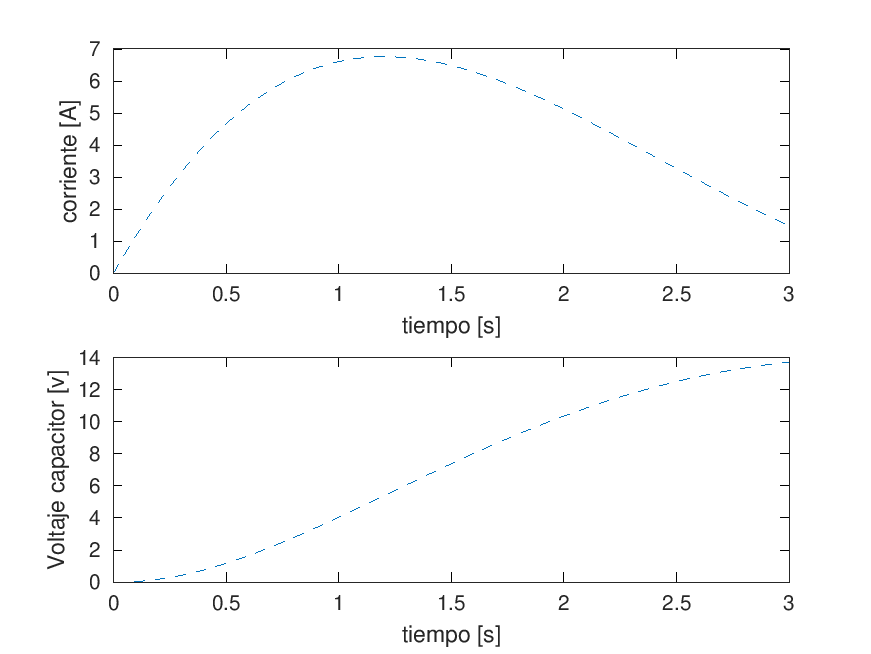

In [29]:
from IPython import display
display.Image('Ejercicio1b.png')

## **Resultados punto 2**

In [32]:
%%writefile Punto2.m
R=2.2e3;L=10e-6;C=100e-9;
Ve = 12;
tiempo_fin = 3
[C,Vc,t]= Euler_RLC(R,L,C,Ve,tiempo_fin);

subplot(211)
plot(t,C,'r-')
xlabel('tiempo [s]')
ylabel('corriente [A]')
subplot(212)
plot(t,Vc,'b-')
xlabel('tiempo [s]')
ylabel('Voltaje capacitor [v]')

print -dpng Ejercicio1_2.png;

Writing Punto2.m


In [35]:
!octave -W Punto2.m # -W : no window system

tiempo_fin = 3
A =

  -2.2000e+08  -1.0000e+05
   1.0000e+07            0

B =

   1.0000e+05
            0

avalor =

  -2.2000e+08
  -4.5455e+03

u = 12


In [38]:
from IPython import display
display.Image('Ejercicio1_2.png')

FileNotFoundError: No such file or directory: 'Ejercicio1_2.png'

FileNotFoundError: No such file or directory: 'Ejercicio1_2.png'

<IPython.core.display.Image object>

## **Resultados punto 3**

Para realizar este punto es necesario realizar una modificación en la función Euler_RLC.m para que permita el cambio en el sentido de la tensión. Creo una función *Euler_RLC2.m*

In [70]:
%%writefile Euler_RLC2.m
%Funcion modelo
function [C,V,t]= Euler_RLC2(R,L,C,escalon,tiempo_fin,tiempo_cambio = 0);
A=[-R/L, -1/L;1/C,0]
B=[1/L;0]
avalor = eig(A)
tL = 0; # utilizo este como flag. Si los autovalores son complejos, preseteo un paso
if iscomplex(avalor(1))
  # paso seleccionado "a dedo" para el caso de autovalores complejos
  tR = log(0.95)/abs(avalor(1))
  primer_elevado =-floor(log10(abs(tR)));
  primera_sig = fix(tR*10.^primer_elevado);
  h1 = abs( primera_sig * 10^-primer_elevado) #paso recomendado

  tL = abs(log(0.05)/abs(avalor(2)))
  if tiempo_fin > 4*tL
    tau = 3*tL
  else
    tau = tiempo_fin
  endif

  cantidad_pasos = ceil(tau/h1)+1 # determino la cantidad de pasos necesarios para obtener el tiempo tau

else
  # calculo el paso óptimo y el tiempo donde aplicar este paso
  tR = log(0.95)/avalor(1)
  primer_elevado =-floor(log10(abs(tR)));
  primera_sig = fix(tR*10.^primer_elevado);
  h1 = primera_sig * 10^-primer_elevado #paso recomendado

  # calculo del tau: tiempo donde se alcanza el 90% estacionario
  tL = log(0.05)/avalor(2)
  tau = 3*tL
  cantidad_pasos = round(tau/h1) # determino la cantidad de pasos necesarios para obtener el tiempo tau

endif

# seteo de variables iniciales
u = escalon
X(:,1) =[0;0];
t(1) = 0;
signo = 1;
m = 1;
# Integración Euler Forward para el paso elegido
for n = 1: cantidad_pasos -1
  t(n+1) = t(n)+h1;
  # Este condicional cambia el signo de la tensión cada tiempo_cambio
  if t(n+1)> (m * tiempo_cambio) && (tiempo_cambio ~=0)
    signo = signo *(-1);
    m = m + 1;
  endif
  Xp(:,n) = A*X(:,n)+B*u*signo;
  X(:,n+1) = X(:,n)+Xp(:,n)*h1;
endfor
C = X(1,:);
V = X(2,:);
endfunction

Overwriting Euler_RLC2.m


In [83]:
%%writefile Punto3.m
R=1;L=1;C=1;
Ve = 12;
tiempo_fin = 3
tc = 10e-3
#[C,Vc,t]= Euler_RLC(R,L,C,Ve,tiempo_fin);
[Cc,Vcc,tc]= Euler_RLC2(R,L,C,Ve,tiempo_fin,tiempo_cambio = tc);


subplot(211)
plot(tc,Cc,'b-')
#hold on
#plot(t,C,'r--')
#legend('Ve alternado','Ve continuo')
xlabel('tiempo [s]')
ylabel('corriente [A]')
subplot(212)
plot(tc,Vcc,'b-')
#hold on
#plot(t,Vc,'r--')
#legend('Ve alternado','Ve continuo')
xlabel('tiempo [s]')
ylabel('Voltaje capacitor [v]')

print -dpng Ejercicio1_3.png;

Overwriting Punto3.m


In [84]:
!octave -W Punto3.m # -W : no window system

tiempo_fin = 3
tc = 0.010000
A =

  -1  -1
   1   0

B =

   1
   0

avalor =

  -0.5000 + 0.8660i
  -0.5000 - 0.8660i

tR = -0.051293
h1 = 0.050000
tL = 2.9957
tau = 3
cantidad_pasos = 61
u = 12

The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.
                                                                               
           |-----------------------------------------------------------|       
      0.8 +|+       +         +         +         +         +       +-+|       
     

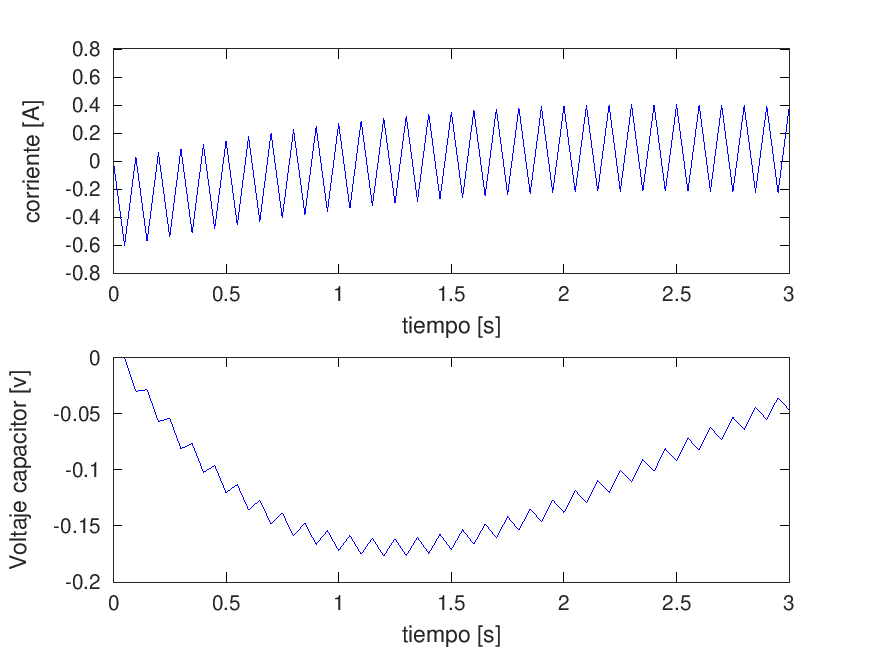

In [85]:
from IPython import display
display.Image('Ejercicio1_3.png')